In [17]:
# logging 
import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)


In [18]:
# environment setup
import gym
# noinspection PyUnresolvedReferences
import gym_yacs_simple_maze

maze = gym.make('SimpleMaze-v0')
print("This is how maze looks like")
situation = maze.reset()
print(type(situation))
print(situation)
maze.render()

This is how maze looks like
<class 'list'>
['0', '1', '1', '1']


'State: 3'

In [19]:
from lcs.agents.xncs import XNCS, Configuration
from utils.nxcs_utils import *


In [20]:
cfg = Configuration(number_of_actions=4,
                    user_metrics_collector_fcn=xncs_metrics,
                    covering_wildcard_chance = 1,
                    mutation_chance = 0,
                    epsilon = 1,
                    lmc=10,
                    lem=20
                   )


In [21]:
explore_trials = 1000
exploit_trials = 500

agent = XNCS(cfg)
_, explore_metrics =\
    agent.explore(maze, explore_trials, False)
population, exploit_metrics =\
    agent.exploit(maze, exploit_trials)

INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 153, 'reward': 1000.0, 'perf_time': 0.04619869999999082, 'numerosity': 128, 'population': 32, 'average_specificity': 1.0, 'fraction_accuracy': 0.88}
INFO:lcs.agents.Agent:{'trial': 100, 'steps_in_trial': 46, 'reward': 1000.0001438416078, 'perf_time': 0.0181773999999848, 'numerosity': 200, 'population': 32, 'average_specificity': 1.0, 'fraction_accuracy': 0.98}
INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 175, 'reward': 1000.0, 'perf_time': 0.06847080000000005, 'numerosity': 200, 'population': 32, 'average_specificity': 1.0, 'fraction_accuracy': 0.97}
INFO:lcs.agents.Agent:{'trial': 300, 'steps_in_trial': 183, 'reward': 1000.0, 'perf_time': 0.071507199999985, 'numerosity': 200, 'population': 32, 'average_specificity': 1.0, 'fraction_accuracy': 0.98}
INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 50, 'reward': 1000.0000365525294, 'perf_time': 0.021861300000011852, 'numerosity': 200, 'population': 32, 'average_specific

In [22]:
df = pd.DataFrame(explore_metrics)
df['trial'] = df.index * cfg.metrics_trial_frequency
df.set_index('trial', inplace=True)
df_exploit = pd.DataFrame(exploit_metrics)
df_exploit['trial'] = df_exploit.index * cfg.metrics_trial_frequency + explore_trials
df_exploit.set_index('trial', inplace=True)
df = df.append(df_exploit)

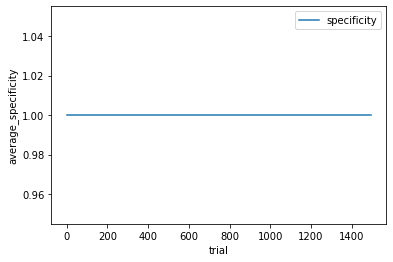

In [23]:
import pandas as pd
import numpy as np

ax = df['average_specificity'].plot()
ax.set_xlabel("trial")
ax.set_ylabel("average_specificity")
ax.legend(["specificity"])


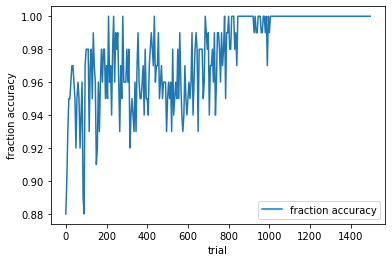

In [24]:
ax = df['fraction_accuracy'].plot()
ax.set_xlabel("trial")
ax.set_ylabel("fraction accuracy")
ax.legend(["fraction accuracy"])

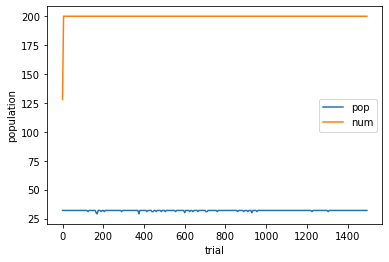

In [25]:
ax = df[['population', 'numerosity']].plot()
ax.set_xlabel("trial")
ax.set_ylabel("population")
ax.legend(["pop", "num"])

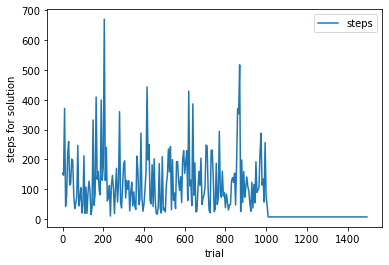

In [26]:
ax = df['steps_in_trial'].plot()
ax.set_xlabel("trial")
ax.set_ylabel("steps for solution")
ax.legend(["steps"])

In [27]:
moves = [
    {'action': 0, 'exp_state': '1001'},  # 3 -> 0
    {'action': 1, 'exp_state': '1010'},  # 0 -> 1
    {'action': 1, 'exp_state': '1100'},  # 1 -> 2
    {'action': 2, 'exp_state': '0101'},  # 2 -> 5
    {'action': 2, 'exp_state': '0110'},  # 5 -> 8
    {'action': 3, 'exp_state': '0010'},  # 8 -> 7
]

for step in moves:
    match_set = population.generate_match_set(step['exp_state'], 0)
    print(f"The best action: {step['action']}")
    prediction = match_set.prediction_array
    print(f"{prediction.index(max(prediction))} {prediction}")

The best action: 0
1 [1e-06, 1280.3139057920484, 1e-06, 1e-06]
The best action: 1
1 [1e-06, 1022.2228432857141, 189.3497017167734, 1e-06]
The best action: 1
2 [1e-06, 1e-06, 885.2147964418139, 189.94004576921154]
The best action: 2
2 [1e-06, 1e-06, 853.0610656271485, 1e-06]
The best action: 2
3 [360.5718274400849, 1e-06, 1e-06, 921.9530187832484]
The best action: 3
3 [501.97477909987873, 504.59087383792325, 1e-06, 1100.0509562769134]


In [28]:
for step in moves:
    match_set = population.generate_match_set(step['exp_state'], 0)
    print(f"The best action: {step['action']}")
    for cl in match_set:
        print(cl)


The best action: 0
Cond:1001 - Act:1 - effect:1000 - Num:23 [fit: 1.000, exp: 6536.00, pred: 1280.314, error:981.05]
Cond:1001 - Act:0 - effect:0101 - Num:1 [fit: 0.000, exp: 0.00, pred: 0.000, error:0.00]
Cond:1001 - Act:2 - effect:1001 - Num:1 [fit: 0.000, exp: 0.00, pred: 0.000, error:0.00]
Cond:1001 - Act:3 - effect:1100 - Num:1 [fit: 0.000, exp: 0.00, pred: 0.000, error:0.00]
The best action: 1
Cond:1010 - Act:1 - effect:0011 - Num:28 [fit: 1.000, exp: 5432.00, pred: 1022.223, error:961.05]
Cond:1010 - Act:2 - effect:0011 - Num:1 [fit: 1.000, exp: 4613.00, pred: 189.350, error:951.61]
Cond:1010 - Act:3 - effect:0010 - Num:1 [fit: 0.000, exp: 0.00, pred: 0.000, error:0.00]
Cond:1010 - Act:0 - effect:1101 - Num:1 [fit: 0.000, exp: 0.00, pred: 0.000, error:0.00]
The best action: 1
Cond:1100 - Act:2 - effect:1110 - Num:26 [fit: 1.000, exp: 4562.00, pred: 885.215, error:941.05]
Cond:1100 - Act:3 - effect:1101 - Num:1 [fit: 1.000, exp: 615.00, pred: 189.940, error:1503.88]
Cond:1100 - A